# Experimentos de probabilidad en R

Usando la librería prob de R

In [1]:
library(prob)
library(matlab)
library(ggplot2)

Loading required package: combinat


Attaching package: 'combinat'


The following object is masked from 'package:utils':

    combn


Loading required package: fAsianOptions

Loading required package: timeDate

Loading required package: timeSeries

Loading required package: fBasics

Loading required package: fOptions


Attaching package: 'prob'


The following objects are masked from 'package:base':

    intersect, setdiff, union



Attaching package: 'matlab'


The following object is masked from 'package:fBasics':

    pascal


The following object is masked from 'package:stats':

    reshape


The following objects are masked from 'package:utils':

    find, fix


The following object is masked from 'package:base':

    sum




Ejercicio: ¿cómo calcular la probabilidad del lanzamiento de una moneda cargada con la función urnsamples?

Supóngase que $P(\{\text{sol}\}) = .7$ y $P(\{\text{águila}\}) = .3$ entonces:

In [2]:
x <- c('sol', 'aguila')
p <- c(0.70, 0.30)
probspace(urnsamples(x, size=1, replace = F, order = F), , probs = p)

out,probs
<chr>,<dbl>
sol,0.7
aguila,0.3


1) Durante 5 años el profesor X ha impartido el mismo curso. En total ha tenido 500 alumnos, de los cuales 80 se han dado de baja, 200 han reprobado y 220 han aprobado. Nos encontramos a uno de estos exalumnos. ¿Cuál es la probabilidad de que éste se haya dado de baja en el curso?

In [3]:
x <- c('baja','reprobo','aprobo')
p <- c(80/500, 200/500, 220/500)
S <- probspace(urnsamples(x, size=1, replace = F, order = F), probs = p)
baja <- subset(S, out == "baja")
cat("Probabilidad de que el alumno se haya dado de baja del curso es de: ", Prob(baja))

Probabilidad de que el alumno se haya dado de baja del curso es de:  0.16

2) Una moneda se lanza al aire 300 veces y se obtienen 152 águilas y 148 soles. ¿Cuál es la probabilidad de sacar un águila?

In [4]:
x <- c('sol', 'aguila')
p <- c(148/300, 152/300)
S <- probspace(urnsamples(x, size=1, replace = F, order = F), probs = p)
aguila <- subset(S, out == "aguila")
cat("Probabilidad de sacar un águila es de: ", Prob(aguila))

Probabilidad de sacar un águila es de:  0.5066667

3) El año pasado nacieron 1613 mujeres y 1531 hombres en la Delegación Coyoacán. Si se selecciona uno de estos bebes al azar, ¿cuál es la probabilidad de que sea niña?

In [5]:
x <- c('niña', 'niño')
p <- c(1613/3144, 1531/3144)
S <- probspace(urnsamples(x, size=1, replace = F, order = F), probs = p)
nina <- subset(S, out == "niña")
cat("Probabilidad de que sea niña es de: ", Prob(nina))

Probabilidad de que sea niña es de:  0.5130407

4) Se lanza un dado de seis caras al aire. Sean los eventos $E=${el resultado es un número par} y $F=${el resultado es un número primo}. Calcular la probabilidad de “el resultado es un número par o un número primo”.

La función $\texttt {isprime( )}$ es parte de la librería de R [matlab](https://cran.r-project.org/web/packages/R.matlab/index.html)

In [6]:
S <- rolldie(1, makespace = TRUE)
par_o_primo <- subset(S, X1  %% 2 == 0 | as.logical(isprime(X1)))
cat("Probabilidad de que el resultado sea un número par o un número primo es de: ", Prob(par_o_primo))

Probabilidad de que el resultado sea un número par o un número primo es de:  0.8333333

5) ¿Cuál es la probabilidad de tener exactamente dos hijos varones en una familia de tres hijos? ¿a lo más dos hijos varones?

In [7]:
x <- c('niña', 'niño')
S <- urnsamples(x, size=3, replace = T, order = T)
S
cat("Probabilidad de tener exactamente dos hijos varones es de: ", 3/8)

X1,X2,X3
<chr>,<chr>,<chr>
niña,niña,niña
niño,niña,niña
niña,niño,niña
niño,niño,niña
niña,niña,niño
niño,niña,niño
niña,niño,niño
niño,niño,niño


Probabilidad de tener exactamente dos hijos varones es de:  0.375

6) Considera una baraja ¿cuál es la probabilidad de sacar un as? ¿de un corazón? ¿de un as de corazones? ¿de un as o de un corazón?

In [8]:
S <- cards(makespace = TRUE)
as <- subset(S, rank == "A")
H <- subset(S, suit == "Heart")

In [9]:
cat("Probabilidad de sacar un As: ", Prob(as))
cat("\n")
cat("Probabilidad de sacar un corazón: ", Prob(H))
cat("\n")
cat("Probabilidad de sacar un as de corazones: ", Prob(intersect(as,H)))
cat("\n")
cat("Probabilidad de sacar un as o de un corazón: ", Prob(union(as,H)))

Probabilidad de sacar un As:  0.07692308
Probabilidad de sacar un corazón:  0.25
Probabilidad de sacar un as de corazones:  0.01923077
Probabilidad de sacar un as o de un corazón:  0.3076923

7) Un sondeo de opinión entre la población adulta acerca de si se desea una nueva línea del metro nos da los siguientes resultados:


|----|A favor|En contra|Total|
|:---:|:---:|:---:|:---:
|Mujeres|210|50|260|
|Hombres|180|60|240|
|Total|390|110|500|

Sea $F$ el evento “el encuestado es mujer” y $C$ el evento “está en contra de la nueva línea del Metro”. Calcular $P(F), P(C), P(F \cap C), P(F \cup C)$.

In [10]:
sexo <- c("Mujer", "Hombre")
sp <- c(260/500,240/500)
opi <- c("A_favor", "En_contra")
op <- c(390/500,110/500)
S <- probspace(urnsamples(sexo, size=1, replace = F, order = F), , probs = sp)
O <- probspace(urnsamples(opi, size=1, replace = F, order = F), , probs = op)

In [11]:
mujer <- subset(S, out == "Mujer")
cat("Probabilidad del evento encuestada sea mujer: ", Prob(mujer))

Probabilidad del evento encuestada sea mujer:  0.52

In [12]:
contra <- subset(O, out == "En_contra")
cat("Probabilidad del evento encuestada/o esté en contra: ", Prob(contra))

Probabilidad del evento encuestada/o esté en contra:  0.22

In [13]:
m <- c("M_A_favor", "M_En_contra")
mp <- c(210/260,50/260)
M <- probspace(urnsamples(m, size=1, replace = F, order = F), , probs = mp)
mujer_contra <- subset(M, out == "M_En_contra")
cat("Probabilidad del evento encuestada sea mujer y esté en contra:", Prob(mujer_contra))

Probabilidad del evento encuestada sea mujer y esté en contra: 0.1923077

In [14]:
cat("Probabilidad del evento encuestada sea mujer o esté en contra:", Prob(union(mujer,contra)))

Probabilidad del evento encuestada sea mujer o esté en contra: 0.74

# Métodos de conteo

1) Tenemos 5 ingredientes de los cuales podemos elegir para pedir nuestra pizza: peperoni, salchicha, anchoas, huitlacoche y aceitunas. ¿Cuántas pizzas distintas podemos formar?

In [15]:
cat("Podemos formar:", nsamp(n=5, k=2, replace = TRUE, ordered = FALSE), " combinaciones de pizzas diferentes")

Podemos formar: 15  combinaciones de pizzas diferentes

2) Para construir una computadora podemos elegir entre las opciones que están en una tienda: dos procesadores, tres sistemas operativos, cuatro tamaños distintos de memoria, 4 discos duros de distinto tamaño y 10 opciones de monitor. ¿Cuántas opciones de computadoras podemos construir?

In [16]:
proc = 2
SO = 3
RAM = 4
HD = 4
MON = 10
cat("Podemos construir:", proc*SO*RAM*HD*MON, " opciones de computadora")

Podemos construir: 960  opciones de computadora

3) ¿Cuántas formas distintas se pueden construir números de tres cifras sin repetir ningún número?

In [17]:
cat("Podemos construir:", 10*9*8, " números de tres cifras sin repetir ninguno")

Podemos construir: 720  números de tres cifras sin repetir ninguno

4) Cuatro personas ordenan diferentes bebidas en un bar. El cantinero sirve las bebidas pero por falta de atención olvida completamente quién ordenó qué. ¿Cuál es la probabilidad de que el cantinero coloque las bebidas correctamente?

In [18]:
comb <- nsamp(n=4, k=4, replace = FALSE, ordered = TRUE)
cat("Solo existe una combinación correcta de entre: ",comb," posibles combinaciones, por lo tanto la probabilidad de que las coloque correctamente es de", 1/comb)

Solo existe una combinación correcta de entre:  24  posibles combinaciones, por lo tanto la probabilidad de que las coloque correctamente es de 0.04166667

5) Rentas $5$ películas para ver: $3$ hoy y $2$ mañana por la noche pero tu amiga Mariana te pide prestadas $2$ películas. ¿De cuántas formas distintas puede Mariana elegir las $2$ películas?

In [19]:
cat("Mariana puede elgir ",nsamp(n=5, k=2, replace = FALSE, ordered = FALSE), "combinaciones de 2 películas")

Mariana puede elgir  10 combinaciones de 2 películas

6) ¿Cuántas manos de poker contienen (exactamente) una tercia? ---> (excluye par, esto es, excluye el llamado full)

In [20]:
choose(13,1)*choose(4,3)*choose(12,2)*choose(4,1)*choose(4,1)

[1] 54912

# Probabilidad condicional

1) Supongamos que en una muestra de 100 personas, 65 de ellas son vacunadas contra la influenza esta temporada de invierno. Cinco de las personas vacunadas contraen la enfermedad. De las 35 personas que no son vacunadas 25 caen enfermas. La siguiente tabla resume esta información:

|----|enfermo|no enfermo|Total|
|:---:|:---:|:---:|:---:|
|vacunados|5|60|65|
|no vacunados|25|10|35|
|Total|30|70|100

$P(${vacunado}$)$

In [21]:
65/100

[1] 0.65

$P(${no vacunado}$)$

In [22]:
35/100

[1] 0.35

$P(${enfermo|vacunado}$)$

In [23]:
5/65

[1] 0.07692308

$P(${no enfermo|vacunado}$)$

In [24]:
60/65

[1] 0.9230769

$P(${enfermo|no vacunado}$)$

In [25]:
25/35

[1] 0.7142857

$P(${no enfermo|no vacunado}$)$ 

In [26]:
10/35

[1] 0.2857143

$P(${vacunado y no enfermo}$)$

In [27]:
60/100

[1] 0.6

$P(${no vacunado y no enfermo}$)$

In [28]:
10/100

[1] 0.1

$P(${no enfermo}$)$

In [29]:
70/100

[1] 0.7

$P(${vacunado} | {no enfermo}$)$

In [30]:
60/70

[1] 0.8571429

2) Considérese dos urnas, la primera tiene $5$ canicas rojas y $3$ canicas verdes y la segunda $2$ canicas rojas y $6$ verdes. Una persona selecciona una canica de la primer urna y la transfiere a la segunda urna sin mostrarte qué color fue. Seleccionas una canica de la segunda urna. ¿Cuál es la probabilidad que la canica que seleccionaste es roja?.

In [31]:
3/9*5/8 + 2/9*3/8

[1] 0.2916667

3) Considérese la siguiente tabla:


|Fuma/No Fuma|Femenino|Masculino|Suma
|:----:|:----:|:----:|:----:|
|No fuma|61|75|136
|Fuma|9|23|32
|Suma|70|98|168

$P(Femenino)$

In [32]:
70/168

[1] 0.4166667

$P(Fuma)$

In [33]:
32/168

[1] 0.1904762

Supóngase que una persona deja de fumar pero no se sabe su género. Si se selecciona una persona no fumadora aleatoriamente, calcular $P(Femenino)$. Sugerencia: piénsese este problema como el de tener dos urnas, cada urna con canicas rojas y verdes como en el ejercicio anterior. La urna 1 y la urna 2 representan fumar y  no fumar respectivamente y las canicas rojas y verdes representan Femenino y Masculino respectivamente. Además, considérese los eventos: $E=${mujer deja de fumar} y usar la regla de probabilidad total condicionando sobre $E$.

In [34]:
62/137*9/32 + 61/137*23/32

[1] 0.4473084

# Eventos Independientes

1) Calcular la probabilidad de sacar un as y corazón en una baraja

In [35]:
4/52*13/52

[1] 0.01923077

2) Se lanzan dos dados, uno verde y otro rojo. Considérense los eventos $E=${los números suman 5}, $F=${el número en el dado verde es impar}. ¿$E$ y $F$ son independientes?.

Son independientes ya que la variable del color del dado no afecta la suma de los números de los dados

3) Supóngase que nuestra elección de postre cuando salimos a comer es independiente del platillo principal que pedimos. La mitad de las veces que vamos a comer al restaurante "L Intervallo" pedimos pasta con camarones y la mitad de las veces pedimos panna cotta de postre. ¿Cuál es la probabilidad de ordenar pasta con camarones y panna cotta dado que comemos en "L Intervallo"?

In [36]:
1/2*1/2

[1] 0.25

4) Sea $E$ el evento de que el número  $111111$  sea ganador en el sorteo Melate (la lotería Melate consiste en elegir una combinación de seis números diferentes entre el  $1$  y el  $56$ , sin orden y sin reemplazo) y  $F$  el evento de que el número  $555555$  sea el ganador.

a) Determina si estos eventos son mutuamente excluyentes

Son mutuamente excluyentes porque solo una combinación de números diferentes puede ser ganadora

b) Determina si estos eventos son independientes

Son independientes porque ninguna de ambas combinaciones es posible dado que los eventos son sin reemplazo, es decir, no es posible la repetición de números

# Teorema de Bayes

1)El siguiente es un mecanismo conocido para elegir a una persona de un grupo pequeño. Digamos que en un grupo de 4 personas quiere seleccionarse a una de ellas para que realice alguna actividad, digamos ir por cervezas a la hielera. Para este efecto, se toman 4 palillos y uno de ellos se recorta; así, se tienen tres palillos largos y uno corto. Las personas toman turnos tomando palillos, ignorando cuál es el corto, y el que saca el palillo corto es el elegido para ir por las cervezas. ¿Tiene alguna ventaja escoger primero, segundo, tercero o cuarto?

Ninguna ya que las probalidades de obtener el palillo corto es la misma independientemente de el turno, $P(E)=\frac{1}{4}$

2)Considera el mismo escenario que el ejemplo  3  pero en lugar de que el sospechoso sea un individuo albino ahora se tiene:

a) El sospechoso del crimen es un individuo pelirrojo y la probabilidad de ser pelirrojo es del  2% . Encontrar  P({pelirrojo}|+),  en donde  +  representa: “el testigo identifica a una persona como pelirroja”.

b) El sospechoso es un individuo de pelo rubio y la probabilidad de tener el pelo rubio es del  15% . Encontrar  P({rubio}|+) , en donde  +  representa: "el testigo identifica a una persona como rubia".

# Variables Aleatorias

1) Considérese lanzar dos monedas distintas. Sea $X$ la variable aleatoria que cuenta el número de águilas que aparecen. Calcula la probabilidad de $P(X=0), P(X=1), P(X=2)$

Sea $H$ águila y $T$ sol, entonces:

In [37]:
S <- tosscoin(2, makespace = TRUE)
S

toss1,toss2,probs
<fct>,<fct>,<dbl>
H,H,0.25
T,H,0.25
H,T,0.25
T,T,0.25


$P(X = 0)$ & $P(X = 2)$

In [38]:
Prob(subset(S, toss1 == "T" & toss2 =='T'))
Prob(subset(S, toss1 == "H" & toss2 =='H'))

[1] 0.25

[1] 0.25

$P(X = 1)$

In [39]:
Prob(subset(S, toss1 == "H" & toss2 =='T' | toss1 == 'T' & toss2 == 'H'))

[1] 0.5

2) Considérese el sorteo de Melate (elegir una combinación de seis números diferentes entre el $1$ y el $56$ sin orden y sin reemplazo) "simplificado" con una bolsa acumulada de $N$ y la variable aleatoria $X$ que toma dos valores: $N$ si se elige la combinación ganadora y $0$ en cualquier otro caso. ¿Cuál es la distribución de probabilidad de $X$

In [40]:
cat("Probabilidad de que X sea 0 es de: ",1/choose(56,6))

Probabilidad de que X sea 0 es de:  3.079914e-08

In [41]:
cat("Probabilidad de que X sea igual a N es de: ")
1 - (1/choose(56,6))

Probabilidad de que X sea igual a N es de: 

[1] 1

3) Calcular el valor esperado de los ejemplos $1)$ y $3)$ de la sección "Distribución de probabilidad de una variable aleatoria" y responder: ¿Si nos ofrecieran jugar uno de estos dos juegos cuál deberíamos elegir?. Nótese que ninguno de los premios o pérdidas es igual al valor esperado, éste simplemente nos da una idea del promedio de los premios y pérdidas que resultarían si el juego se repitiese un gran número de veces.

1) Supongamos que un volado ofrece una ganancia de $\$ 100$ si sale águila y una pérdida de $\$ 60$ si se sale sol. La variable aleatoria $X$ es la función dada por: $X(A) = 100$, $X(S) = -60$. La distribución de probabilidad $f$ es:$f(100) = P(X = 100) = P(\{A\}) = \frac{1}{2}$

$f(-60) = P(X = -60) = P(\{S\}) = \frac{1}{2}$

El valor esperado está dado por:

$$E(X) = \frac{1}{n}\displaystyle\sum_{i=1}^nx_i.$$

Por lo tanto el valor esperado es de:

$$E(X) = 100*.5-60*.5 = 20$$

3) Pensemos en una urna con $10$ canicas rojas, $2$ amarillas y $3$ azules. Se nos ofrecen los siguientes premios: perder $\$100$ si sacamos una canica roja, ganar $\$150$ si sacamos un canica azul o amarilla. La variable aleatoria $Y$ es $Y(\{roja\}) = -100, Y (\{azul\}) = Y (\{amarilla\}) = 150$. La distribución de probabilidad de $f$ es:

$$f(-100) = P(Y = -100) = P(\{roja\}) = \frac{10}{15}$$
$$f(150) = P(Y = 150) = P(\{azul\} \cup \{amarilla\}) = \frac{3}{15} + \frac{2}{15}$$

Por lo tanto el valor esperado es de:

$$E(roja) = -100*0.66+150*0.15= -43.5$$

Dado que en el primer juego el valor esperado es el mismo, y en el segundo juego el valor esperado de $E(Y)=-43.5$ y en el juego del volado tenemos un valor esperado de $E(X) = 20$. Deberiamos optar por jugar al juego del volado.

4)  Los juegos de azar en los casinos pueden representarse por medio de variables aleatorias. Consideremos una versión simplificada de una máquina de palanca: existen dos figuras, digamos un cuadrado y un triángulo, que pueden aparecer en tres columnas de una cinta circular. El jugador baja la palanca, las cintas giran y al detenerse cada columna muestra un cuadrado o un triángulo. Las $8$ posibilidades equiprobables son: 

$$\begin{array}{ccc} \blacksquare &\blacksquare& \blacksquare \\ \blacksquare & \blacksquare& \blacktriangle \\ \blacksquare & \blacktriangle & \blacksquare \\ \blacksquare & \blacktriangle & \blacktriangle \\ \blacktriangle & \blacksquare & \blacksquare \\ \blacktriangle & \blacksquare & \blacktriangle \\ \blacktriangle & \blacktriangle & \blacksquare \\ \blacktriangle & \blacktriangle & \blacktriangle \end{array}$$

Supongamos que para jugar se introduce una ficha de $\$300$ y los premios asociados son: $\$500$ si salen tres figuras iguales y $\$0$ de cualquier otra forma. Sea $X$ la variable aleatoria que mide la ganancia o pérdida de jugar en la máquina. Calcular $E(X)$.

In [42]:
S <- rolldie(3, nsides = 2, makespace = TRUE)
S <- addrv(S, U = X1+X2+X3)
print(S)

  X1 X2 X3 U probs
1  1  1  1 3 0.125
2  2  1  1 4 0.125
3  1  2  1 4 0.125
4  2  2  1 5 0.125
5  1  1  2 4 0.125
6  2  1  2 5 0.125
7  1  2  2 5 0.125
8  2  2  2 6 0.125


In [43]:
Prob(S, U == 3 | U == 6)

[1] 0.25

La distribución de probabilidad de $f$ es:

$$f(500) = P(X = 500) = P(\{3 iguales\}) = \frac{2}{8}$$

$$f(-300) = P(X = -300) = P(\{no iguales\}) = \frac{6}{8}$$

Por lo tanto el valor esperado es de:

$$E(X) = 500*.25-300*.75 = -100$$

5) Encontrar los histogramas de probabilidad para las distribuciones asociadas a las siguientes variables aleatorias:

a) El número de águilas que aparecen cuando lanzamos tres monedas al aire.
Sea $1$ águila y $2$ sol, entonces:

In [44]:
tosscoin(3, makespace=TRUE)

toss1,toss2,toss3,probs
<fct>,<fct>,<fct>,<dbl>
H,H,H,0.125
T,H,H,0.125
H,T,H,0.125
T,T,H,0.125
H,H,T,0.125
T,H,T,0.125
H,T,T,0.125
T,T,T,0.125


b) La suma de los números de las caras cuando se lanzan dos dados.



In [45]:
S <- rolldie(2, nsides = 6, makespace=TRUE)
S <- addrv(S, U = X1+X2)
df = data.frame(marginal(S, vars = "U"))

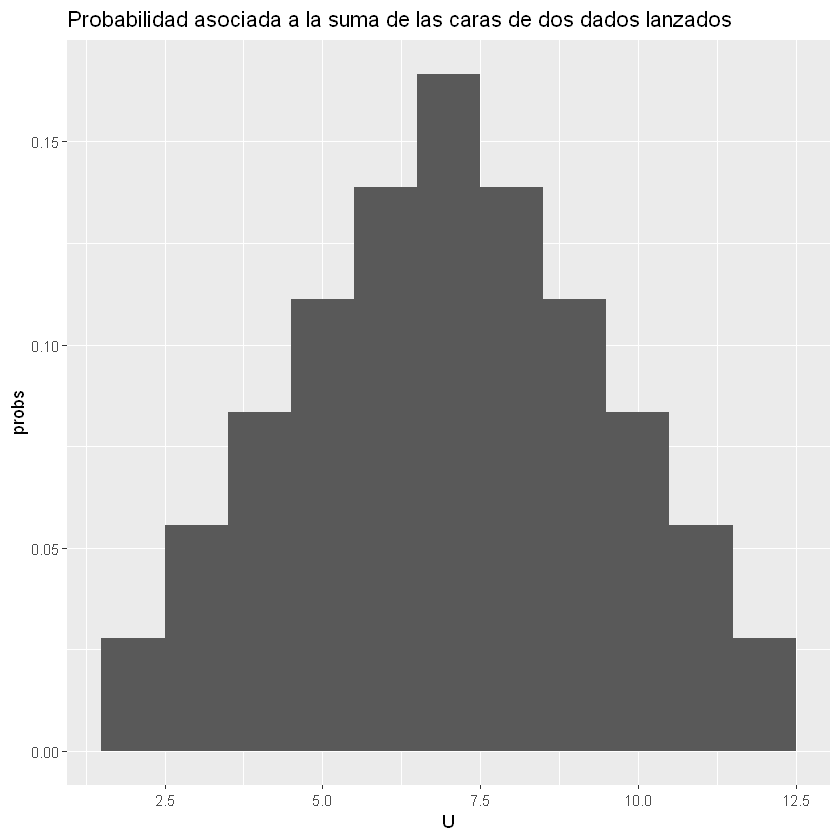

In [46]:
ggplot(data = df, aes(x=U, y=probs)) + 
geom_col(width=1) + 
ggtitle('Probabilidad asociada a la suma de las caras de dos dados lanzados')

6) Se venden 8000 boletos para una rifa de $\$5000.00$ y cada boleto cuesta $\$2.00$.

a) Encontrar la ganancia esperada del comprador de un boleto.

Dado que la probabilidad de ganar el premio es de:

$$\frac{1}{8000}(5000-2) + \left(1-\frac{1}{8000}\right)(-2)$$

In [47]:
cat("La ganancia esperada del comprador de un boleto es de: ", 1/8000*(5000-2)+(1-(1/8000))*-2)

La ganancia esperada del comprador de un boleto es de:  -1.375

b) Hacer la gráfica de la ganancia esperada que tiene una compradora en términos de un número de boletos $n$.



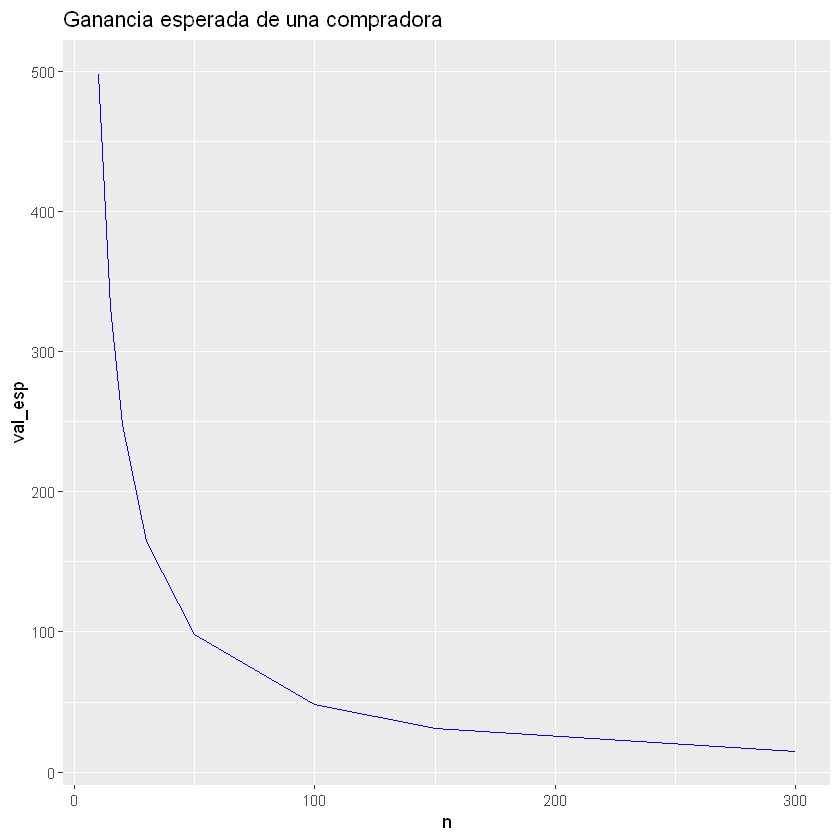

In [48]:
n <- c(10,15,20,30,50,100,150,300)
val_esp <- c()
for (v in n) {
    val <- 1/v*(5000-2)+(1-(1/v))*-2
    val_esp <- append(val_esp,val)
}
df_compradora <- data.frame(n, val_esp)
ggplot(data=df_compradora, aes(x=n, y=val_esp)) +
geom_line(colour='blue') + 
ggtitle('Ganancia esperada de una compradora')

c) ¿Cuál debería de ser el premio mínimo para que se pudiese garantizar “salir a mano” al comprar todos los boletos.

Pensemos que los boletos de la rifa cuestan $\$2$
y que compramos todos los boletos, nuestro caso base sería que n = 1, por lo tanto no podemos tener un premio menor al costo del boleto porque perderiamos dinero, por lo tanto pensemos que el premio mínimo sería el mismo que el costo del boleto, $\$2$:
$$\frac{1}{1}(2-2) + \left(1-\frac{1}{1}\right)(-2)$$

In [49]:
1/1*(2-2)+(1-(1/1))*-2

[1] 0

Podemos generalizarlo para cualquier $n$ boletos vendidos y cualquier precio de boleto que sea igual al premio ofrecido $b = p$

In [51]:
n <- c(10,15,20,30,50,100,150,300)
boleto <- c(2,20,100,200,1000)
val_esp <- c()
for (v in n) {
    for (b in boleto){
        val <- v/v*(b-b)+(1-(v/v))*-b
        val_esp <- append(val_esp,val)        
    }
}
print(val_esp)

 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0
